In [26]:
#%matplotlib inline
import pandas as pd
import numpy as np

In [27]:
df = pd.read_csv('D:/ml/kaggle/Bike Sharing Demand/train.csv', parse_dates=[0])
test = pd.read_csv('D:/ml/kaggle/Bike Sharing Demand/test.csv', parse_dates=[0])

In [28]:
df.shape

(10886, 12)

In [29]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [30]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


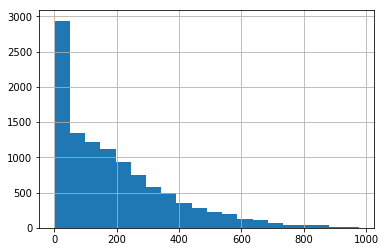

In [32]:
df['count'].hist(bins=20)

## countを対数に変換

In [33]:
df['count'] = np.log(df['count'] + 1)

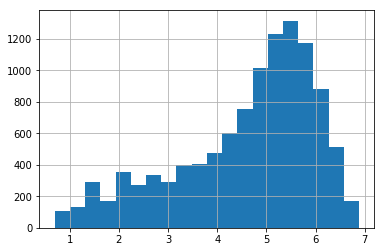

In [34]:
df['count'].hist(bins=20)

In [35]:
df.rename(columns={'count':'rentals'}, inplace=True)

In [36]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,rentals
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,2.833213
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,3.713572
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,3.496508
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,2.639057
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,0.693147


In [37]:
df.shape

(10886, 12)

In [38]:
df = df.append(test,sort=False)

In [39]:
df.shape

(17379, 12)

## datetimeを年月日、時間、曜日に分割

In [40]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['dayofweek'] = df['datetime'].dt.dayofweek
df['hour'] = df['datetime'].dt.hour

In [41]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,rentals,year,month,day,dayofweek,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,2.833213,2011,1,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,3.713572,2011,1,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,3.496508,2011,1,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,2.639057,2011,1,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,0.693147,2011,1,1,5,4


In [42]:
df.sort_values('datetime', inplace=True)

In [43]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,rentals,year,month,day,dayofweek,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,2.833213,2011,1,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,3.713572,2011,1,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,3.496508,2011,1,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,2.639057,2011,1,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,0.693147,2011,1,1,5,4


## tempに関して4要素の移動平均

In [44]:
df['rolling_temp'] = df['temp'].rolling(4, min_periods=1).mean()

In [59]:
np.corrcoef(df['temp'], df['rentals'])

array([[1.        , 0.37658702],
       [0.37658702, 1.        ]])

In [58]:
np.corrcoef(df['rolling_temp'], df['rentals'])

array([[1.        , 0.34528294],
       [0.34528294, 1.        ]])

In [45]:
df['rolling_temp'].describe()

count    17379.000000
mean        20.376383
std          7.846824
min          0.820000
25%         13.735000
50%         20.500000
75%         26.855000
max         39.770000
Name: rolling_temp, dtype: float64

In [46]:
df.shape

(17379, 18)

In [47]:
df.head().T

,0,1,2,3,4
datetime,2011-01-01 00:00:00,2011-01-01 01:00:00,2011-01-01 02:00:00,2011-01-01 03:00:00,2011-01-01 04:00:00
season,1,1,1,1,1
holiday,0,0,0,0,0
workingday,0,0,0,0,0
weather,1,1,1,1,1
temp,9.84,9.02,9.02,9.84,9.84
atemp,14.395,13.635,13.635,14.395,14.395
humidity,81,80,80,75,75
windspeed,0,0,0,0,0
casual,3,8,5,3,0


In [48]:
df.year.value_counts()

2012    8734
2011    8645
Name: year, dtype: int64

In [49]:
test = df[df['rentals'].isnull()]

In [50]:
df = df[~df['rentals'].isnull()]

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
train, valid = train_test_split(df, test_size=0.3 ,random_state=42)

In [53]:
train.shape, valid.shape

((7620, 18), (3266, 18))

In [55]:
removed_cols = ['rentals', 'casual', 'registered', 'datetime']

In [56]:
feats = [c for c in df.columns if c not in removed_cols]

In [57]:
from sklearn.tree import DecisionTreeRegressor

In [30]:
dt = DecisionTreeRegressor(random_state=42, max_depth=2)

In [31]:
dt.fit(train[feats], train['rentals'])

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

In [42]:
rf.fit(train[feats], train['rentals'])

C:\ProgramData\Anaconda3-5.1.0\envs\tensorflow-gpu\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [43]:
preds = rf.predict(valid[feats])

In [44]:
from sklearn.metrics import mean_squared_error

In [45]:
mean_squared_error(valid['rentals'], preds)**(1/2)

0.317289643798147

In [46]:
train_preds = rf.predict(train[feats])

In [47]:
mean_squared_error(train['rentals'], train_preds)**(1/2)

0.13603636938252897

In [48]:
test['count'] = np.exp(rf.predict(test[feats]))

In [49]:
test[['datetime', 'count']].to_csv('rf.csv', index=False)

In [50]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=200)

In [51]:
rf.fit(train[feats], train['rentals'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [52]:
preds = rf.predict(valid[feats])

In [53]:
mean_squared_error(valid['rentals'], preds)**(1/2)

0.29569954888971733

In [54]:
train_preds = rf.predict(train[feats])

In [55]:
mean_squared_error(train['rentals'], train_preds)**(1/2)

0.1132748661463232

In [56]:
test['count'] = np.exp(rf.predict(test[feats]))

In [57]:
test[['datetime', 'count']].to_csv('rf_opt.csv', index=False)

In [58]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=200, oob_score=True)

In [59]:
rf.fit(df[feats], df['rentals'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [60]:
mean_squared_error(df['rentals'], rf.oob_prediction_)**(1/2)

0.2947592354264301

In [61]:
rf.oob_score_

0.9568747147770368

In [62]:
from sklearn.metrics import r2_score

In [63]:
r2_score(df['rentals'], rf.oob_prediction_)

0.9568747147770368

In [64]:
r2_score(df['rentals'], df['rentals'])

1.0

In [65]:
r2_score(df['rentals'], np.full(rf.oob_prediction_.shape[0], df['rentals'].mean()))

0.0

In [66]:
r2_score(df['rentals'], np.full(rf.oob_prediction_.shape[0], 10000))

-49590472.39833184

In [67]:
test['count'] = np.exp(rf.predict(test[feats]))

In [68]:
test[['datetime', 'count']].to_csv('rf_full.csv', index=False)

In [69]:
train.shape , valid.shape

((8164, 18), (2722, 18))

In [70]:
train, valid = df[df['day'] <= 15], df[df['day'] > 15]

In [71]:
train.shape , valid.shape

((8600, 18), (2286, 18))

In [72]:
rf.fit(train[feats], train['rentals'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [73]:
preds = rf.predict(valid[feats])

In [74]:
mean_squared_error(valid['rentals'], preds)**(1/2)

0.33394090505989527

In [75]:
feats = [c for c in feats if c not in ['day']]

In [76]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=200, min_samples_split=4, max_features=0.9, max_depth=17, oob_score=True)

In [77]:
rf.fit(df[feats], df['rentals'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features=0.9, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [78]:
preds = rf.predict(df[feats])

In [79]:
mean_squared_error(df['rentals'], rf.oob_prediction_)**(1/2)

0.2946742973209417

In [80]:
train_preds = rf.predict(df[feats])

In [81]:
mean_squared_error(df['rentals'], train_preds)**(1/2)

0.13831610801561786

In [82]:
rf.predict(test[feats])

array([2.49122293, 1.78682158, 1.38554013, ..., 4.96044002, 4.67216369,
       4.12849154])

In [83]:
test['count'] = np.exp(rf.predict(test[feats]))

In [84]:
test[['datetime', 'count']].to_csv('rf_full_wo_day.csv', index=False)

In [85]:
feats = [c for c in feats if c not in ['month', 'holiday']]

In [86]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=200, min_samples_split=4, max_features=0.9, max_depth=17, oob_score=True)

In [87]:
rf.fit(df[feats], df['rentals'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features=0.9, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [88]:
preds = rf.predict(df[feats])

In [89]:
mean_squared_error(df['rentals'], rf.oob_prediction_)**(1/2)

0.302420216219632

In [90]:
train_preds = rf.predict(df[feats])

In [91]:
mean_squared_error(df['rentals'], train_preds)**(1/2)

0.14275559848068647

In [92]:
rf.predict(test[feats])

array([2.58856773, 1.73740232, 1.38720454, ..., 4.62458706, 4.5111091 ,
       3.87283413])

In [93]:
test['count'] = np.exp(rf.predict(test[feats]))


In [94]:
test[['datetime', 'count']].to_csv('rf_full_wo_month.csv', index=False)

In [98]:
def cv(df, test, k, feats, y_name):
    preds, score, fis = [], [], []
    
    chunk = df.shape[0] // k
    for i in range(k):
        if i + 1 < k:
            valid = df.iloc[i*chunk: (i+1)*chunk]
            train = df.iloc[: i*chunk].append(df.iloc[(i+1)*chunk:])
            
        else:
            valid = df.iloc[i*chunk:]
            train = df.iloc[: i*chunk] 

        rf = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=200, min_samples_split=4, max_features=0.9, max_depth=17, oob_score=True)
        
        rf.fit(train[feats], train[y_name])
        
        score.append(mean_squared_error(valid[y_name], rf.predict(valid[feats]))**(1/2))  
        
        preds.append(rf.predict(test[feats]))  
        
        fis.append(rf.feature_importances_)
        
        print(i, 'OK')
    return pd.Series(score), pd.Series(preds).mean(), fis

In [99]:
score, preds, fis = cv(df, test, 20, feats, 'rentals')

0 OK
1 OK
2 OK
3 OK
4 OK
5 OK
6 OK
7 OK
8 OK
9 OK
10 OK
11 OK
12 OK
13 OK
14 OK
15 OK
16 OK
17 OK
18 OK
19 OK


In [100]:
score.mean()

0.3521503290442458

In [101]:
test['count'] = np.exp(preds)

In [102]:
test[['datetime', 'count']].to_csv('rf_cv_wo_day.csv', index=False)

In [103]:
fi = pd.Series(pd.DataFrame(fis).mean().values, index=feats)

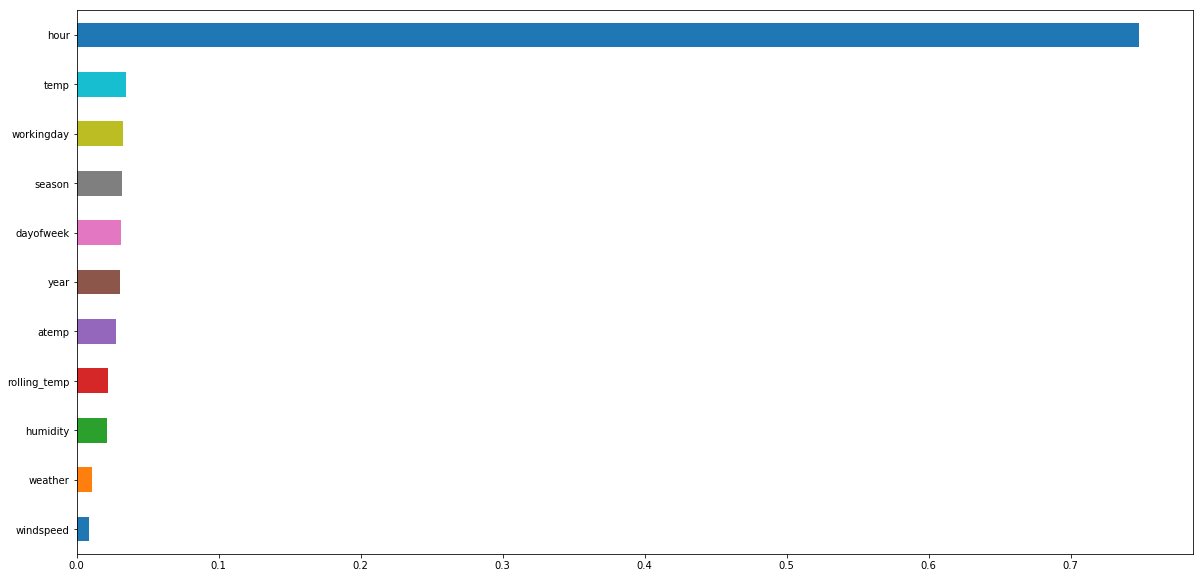

In [104]:
fi.sort_values().plot.barh(figsize=(20,10))

In [105]:
feats = [c for c in feats if c not in ['holiday']]

In [106]:
score, preds, fis = cv(df, test, 20, feats, 'rentals')

0 OK
1 OK
2 OK
3 OK
4 OK
5 OK
6 OK
7 OK
8 OK
9 OK
10 OK
11 OK
12 OK
13 OK
14 OK
15 OK
16 OK
17 OK
18 OK
19 OK


In [107]:
score.mean()

0.3521503290442458

In [108]:
test['count'] = np.exp(preds)

In [109]:
test[['datetime', 'count']].to_csv('rf_cv_wo_holiday.csv', index=False)